# Choose a Data Set

You can choose to analyze any data that you would like! Remember, you need 1000 rows of non-null data in order to get 5 points for the "Data" criteria of my [rubric](https://docs.google.com/document/d/1s3wllcF3LLnytxwD8mZ-BCypXKnfaahnizWGNojT-B4/edit?usp=sharing). Consider looking at [Kaggle](https://www.kaggle.com/datasets) or [free APIs](https://free-apis.github.io/#/browse) for datasets of this size. Alternatively, you can scrape the web to make your own dataset! :D

Once you have chosen your dataset, please read your data into a dataframe and call `.info()` below. If you don't call `info` I will give you 0 points for the first criteria described on the [rubric](https://docs.google.com/document/d/1s3wllcF3LLnytxwD8mZ-BCypXKnfaahnizWGNojT-B4/edit?usp=sharing).

In [6]:
import requests
import csv
import os
import numpy as np

def fetch_all_pokemon_stats():
    base_url = "https://pokeapi.co/api/v2/pokemon"
    results = []

    next_url = base_url
    while next_url:
        response = requests.get(next_url)
        if response.status_code == 200:
            data = response.json()
            for pokemon in data["results"]:

                pokemon_details = requests.get(pokemon["url"]).json()
                name = pokemon_details["name"]
                stats = {
                    stat['stat']['name']: stat['base_stat']
                    for stat in pokemon_details["stats"]
                }
                results.append({"name": name, **stats})
            next_url = data["next"]
        else:
            print(f"Failed to fetch data: {response.status_code}")
            break

    return results

def save_to_csv(file_name, data):
    with open(file_name, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.DictWriter(file, fieldnames=["name", "hp", "attack", "defense", "special-attack", "special-defense", "speed"])
        writer.writeheader()
        writer.writerows(data)

def load_from_csv(file_name):
    with open(file_name, mode='r', encoding='utf-8') as file:
        reader = csv.DictReader(file)
        return [row for row in reader]

def main():
    file_name = "pokemon_stats.csv"

    if os.path.exists(file_name):
        print(f"Loading data from {file_name}...")
        all_pokemon_stats = load_from_csv(file_name)
    else:
        print("Fetching data from PokeAPI...")
        all_pokemon_stats = fetch_all_pokemon_stats()
        save_to_csv(file_name, all_pokemon_stats)
        print(f"Data saved to {file_name}.")

    for pokemon in all_pokemon_stats[:5]:
        print(pokemon)

if __name__ == "__main__":
    main()


Loading data from pokemon_stats.csv...
{'name': 'bulbasaur', 'hp': '45', 'attack': '49', 'defense': '49', 'special-attack': '65', 'special-defense': '65', 'speed': '45'}
{'name': 'ivysaur', 'hp': '60', 'attack': '62', 'defense': '63', 'special-attack': '80', 'special-defense': '80', 'speed': '60'}
{'name': 'venusaur', 'hp': '80', 'attack': '82', 'defense': '83', 'special-attack': '100', 'special-defense': '100', 'speed': '80'}
{'name': 'charmander', 'hp': '39', 'attack': '52', 'defense': '43', 'special-attack': '60', 'special-defense': '50', 'speed': '65'}
{'name': 'charmeleon', 'hp': '58', 'attack': '64', 'defense': '58', 'special-attack': '80', 'special-defense': '65', 'speed': '80'}


# Is Skiddo a better physical sweeper or a tank?

Initial Question:

Skiddo is a Grass-type Goat Pokémon introduced in Generation VI. Since goats are the best animal, Skiddo is clearly the best Pokémon. Sadly, the Skiddo community has been consistently screwed over by GameFreak. Because Skiddo is a stage 1 Pokémon and can be encountered early on, I expect it to be  much weaker than most other Pokémon. Even if inefficient in combat, Skiddo's many other skills (being cute) make it vital to a Pokémon team. So, if someone were evil enough to attack a Skiddo and its team, what role in that team could Skiddo best play?

More Specific question:

Based on base stats, is Skiddo a better Physical Sweeper (Having high attack/speed) or Tank (Having high Defense/Sp. Defense) based on its base stat total. We'll assume the Skiddo is using its recommended item from the competitive Pokémon site "Smogon". This item, Eviolite, raises Skiddo's Defense and Sp. Def by 50%.

# My Analysis

Percentiles:
Hp: 46.77 percentile
Attack: 36.33 percentile
Defense: 53.00 percentile
Special-attack: 44.47 percentile
Special-defense: 71.04 percentile
Speed: 31.34 percentile


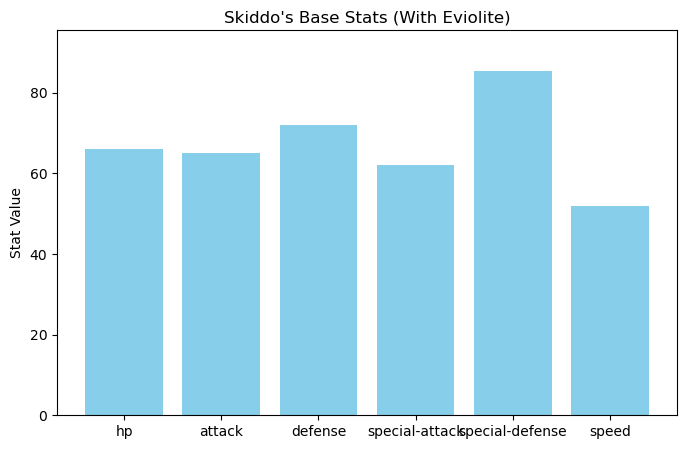

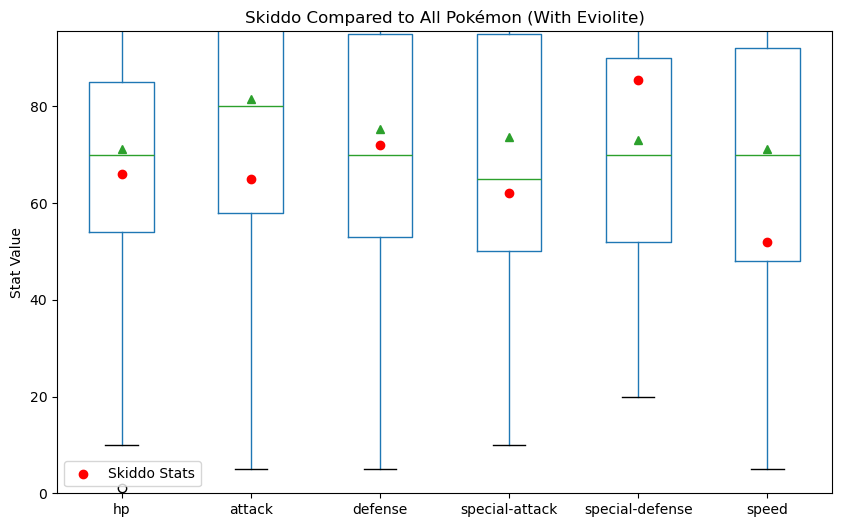

Mean and Standard Deviation:
Hp: Mean = 71.26, Std Dev = 26.76, Z-Score = -0.20
Attack: Mean = 81.58, Std Dev = 31.67, Z-Score = -0.52
Defense: Mean = 75.24, Std Dev = 30.49, Z-Score = -0.11
Special-attack: Mean = 73.65, Std Dev = 32.47, Z-Score = -0.36
Special-defense: Mean = 72.97, Std Dev = 27.36, Z-Score = 0.46
Speed: Mean = 71.16, Std Dev = 30.31, Z-Score = -0.63


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def calculate_percentiles(pokemon_name, all_pokemon_stats, use_eviolite=False):
    stats_keys = ["hp", "attack", "defense", "special-attack", "special-defense", "speed"]

    df = pd.DataFrame(all_pokemon_stats)
    df.info()
    for key in stats_keys:
        df[key] = pd.to_numeric(df[key], errors='coerce')

    target_pokemon = df[df['name'] == pokemon_name]
    if target_pokemon.empty:
        print(f"Pokemon {pokemon_name} not found in the data.")
        return None

    skiddo_stats = target_pokemon.iloc[0][stats_keys]

    if use_eviolite:
        skiddo_stats["defense"] *= 1.5
        skiddo_stats["special-defense"] *= 1.5

    percentiles = {
        stat: sum(df[stat] <= skiddo_stats[stat]) / len(df[stat]) * 100
        for stat in stats_keys
    }
    return percentiles

def generate_analysis(pokemon_name, all_pokemon_stats, use_eviolite=False):
    stats_keys = ["hp", "attack", "defense", "special-attack", "special-defense", "speed"]

    df = pd.DataFrame(all_pokemon_stats)
    df.info()
    for key in stats_keys:
        df[key] = pd.to_numeric(df[key], errors='coerce')

    target_pokemon = df[df['name'] == pokemon_name]
    if target_pokemon.empty:
        print(f"Pokemon {pokemon_name} not found in the data.")
        return

    skiddo_stats = target_pokemon.iloc[0][stats_keys]

    if use_eviolite:
        skiddo_stats["defense"] *= 1.5
        skiddo_stats["special-defense"] *= 1.5

    percentiles = calculate_percentiles(pokemon_name, all_pokemon_stats, use_eviolite=use_eviolite)
    if percentiles:
        print("Percentiles:")
        for stat, percentile in percentiles.items():
            print(f"{stat.capitalize()}: {percentile:.2f} percentile")

    plt.figure(figsize=(8, 5))
    plt.bar(stats_keys, skiddo_stats, color='skyblue')
    plt.title(f"{pokemon_name.capitalize()}'s Base Stats{' (With Eviolite)' if use_eviolite else ''}")
    plt.ylabel("Stat Value")
    plt.ylim(0, 255 if not use_eviolite else max(skiddo_stats) + 10)
    plt.show()

    plt.figure(figsize=(10, 6))
    df.boxplot(column=stats_keys, grid=False, showmeans=True)
    plt.scatter(range(1, len(stats_keys) + 1), skiddo_stats, color='red', label=f"{pokemon_name.capitalize()} Stats")
    plt.legend()
    plt.title(f"{pokemon_name.capitalize()} Compared to All Pokémon{' (With Eviolite)' if use_eviolite else ''}")
    plt.ylabel("Stat Value")
    plt.ylim(0, 255 if not use_eviolite else max(skiddo_stats) + 10)
    plt.show()

    mean_stats = df[stats_keys].mean()
    std_stats = df[stats_keys].std()

    print("Mean and Standard Deviation:")
    for stat in stats_keys:
        mean = mean_stats[stat]
        std_dev = std_stats[stat]
        skiddo_stat = skiddo_stats[stat]
        z_score = (skiddo_stat - mean) / std_dev
        print(f"{stat.capitalize()}: Mean = {mean:.2f}, Std Dev = {std_dev:.2f}, Z-Score = {z_score:.2f}")

def load_from_csv(file_name):
    return pd.read_csv(file_name).to_dict('records')

pokemon_stats = load_from_csv("pokemon_stats.csv")

generate_analysis("skiddo", pokemon_stats, use_eviolite=True)


### Skiddo Analysis
Although Skiddo defense use to be its worst trait, ranking in the 18th percentile out of all Pokémon, the Eviolite raises Skiddo all the way up to the 53, better than average! Skiddo's new best stat based off percentile is its special defence, ranking at the 74th percentile! It still has negitive z scores for hp, attack, special attack, and speed, meaning these are all below average. Based on standard deviation, Skiddo's stats mostly deviate from other Pokémon in its Attack and Special attack. While this seems to support it as a phyisical sweeper, Skiddo's deviation is from being worse than others, so it's actually a downside.My favorite way to visualise Skiddo's stats is the box plot, which shows us that its special defense is by far it's best stat (Based on how far it is from the mean represented by the green triangle). Considering Skiddo has a high defense, an especially high special defense, and negitive z scores in hp and attack, Skiddo seems to be best used as a tank. Although it could be used as a physical sweeper (And is often recommended in that role, hence this question), it's stats are not going to be helpful in that role.